ФИНАЛЬНЫЙ ПРОЕКТ

**ТЕМА:** АНАЛИЗ ОТТОКА КЛИЕНТОВ БАНКА

**ЗАДАЧА ПРОЕКТА:** Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.
Заказчиками являются маркетологи, которые занимаются оттком клиентом.

**ОПИСАНИЕ ИСХОДНЫХ ДАННЫХ:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Датасет включает в себя колонки со следующим содержанием:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности 
- `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

**ПЛАН ИССЛЕДОВАНИЯ:**

1. Получить данные и проверить данные на соотствие теме исследования
2. Предобработка полученных данных и подготовка их к дальнейшему исследованию:
    * Проверка корректности наименования колонок
    * Поиск и изучение пропущенных значений
    * Исследование типов данных
    * Поиск и изучение явных и неявных дубликатов
    * Поиск и изучение выбросов и аномалий в данных
3. Исследовательский анализ данных:  
    * Распределение клиентов в разрезе различных признаков
    * Описание портретов клиентов различных сегментов
    * Корреляционный анализ по различным признакам
    * Выявление основных показателей которые влияют на отток клиентов
    * Сегментация на основе показателей
4. Проверка статистических гипотез:
    * Формулировка гипотез
    * Проверка статистической значимости
5. Выводы и рекоменадции для отдела маркетинга
6. Подготовка презентации на основе проекта
    


<hr style="border: 2px solid #425F57;" />
<hr style="border: 2px solid #425F57;" />

## Получение данных

In [1]:
#Импортируем библиотеки
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.options.mode.chained_assignment = None
import scipy.stats as stats
import plotly.express as px
from scipy import stats as st
import math as mth
import seaborn as sns

In [2]:
#открытие файла с данными

try:
    path = 'C:\\Users\\User\\OneDrive\\Рабочий стол\\проекты\\'
    df = pd.read_csv(path + 'данные_о_пользователях.csv') 
except: 
    path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
    df = pd.read_csv(path) 

#выводим первые 5 строк датафрйема и общую информацию о нем
display(df.head())
display(df.info())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* При первой визуальной оценке датафрейма видно, что данные подходят к цели нашего исследования и соответсвуют описанию исходных данных
* В данных представлена информация о 10 000 клиентах банка
* В датафрейме содержится 10 000 строк и 12 столбцов
* В датафрейме присутствуют пропуски,необоходимо проверить их отдельно
* Названия столбцов соответвуют их содержанию, но не приведены к единому стилю, некоторые требуется переименовать
* В датафрейме представлены данные 3 типов данных: object, float64,int64. Содержание столбцов впринципе соответсвует типам данных, но некоторые можно изменить.
</div>       
<br>

<hr style="border: 2px solid #425F57;" />
<hr style="border: 2px solid #425F57;" />

## Предобработка данных

### Наименование колонок

При первой визуальной оценке датафрейма, было видно что наименование столбцов не было приведено к единому стилю, поэтому требуется их переименовать:

In [3]:
#выводим названия всех столбцов датафрейма
print('Наименования всех столбцов ДО внесения изменений:',df.columns)

#приводим названия столбцов к нижнему регистру и доавляем нижнее полчеркивание
df.columns = df.columns.str.lower()
df=df.rename(columns={'userid': 'user_id'})

print('')
#проверяем
print('Наименования всех столбцов ПОСЛЕ внесения изменений:',df.columns)

Наименования всех столбцов ДО внесения изменений: Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

Наименования всех столбцов ПОСЛЕ внесения изменений: Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* В исходных данных столбцы не были приведены к единому стилю, поэтому мы привели данные нижнему регистру и добавили в столбце с номером клиента нижнее подчекивание

</div>       
<br>

### Пропущенные значения

В полученных были допущены пропуски, посмотрим подробнее:

In [4]:
#Подсчитываем количество пропусков в каждом столбце
print('Колличество пропусков в столбцах:')
display(df.isna().sum())

#Подсчитываем % пропусков в данных в каждом столбце
print('Процент пропусков в столбцах:')
((df.isnull().sum ()/ len(df))* 100).round(2)

Колличество пропусков в столбцах:


user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Процент пропусков в столбцах:


user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

Пропуски допущены в двух столбцах:"возраст" и "баланс". Пропуски в столбце "возраст" можно удалить без критичного процента потери данных (менее 1%), а вот со столбцом "баланс" так сделать не получится, т.к. процент потери данных будет слишком большой.  
Предположим, что пропуски в данном столбце означают нулевой баланс, для этого сначала проверим, есть ли клиенты у которых баланс равен 0

In [5]:
#делаем срез по клиентам у которых баланс равен 0
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


Таких клиентов всего два и у обоих из них есть кредитные карты, возможно на балансе клиентов просто нет свох средств и они пользуются кредитными.  
Исходя из этого считаю логичными, замена пропусков в столбце "баланс" на 0

In [6]:
#удаляем пропуски в столбце "возраст" и заменяем остальные пропуски (т.е. в столбце "баланс") на 0
df=df.dropna(subset=['age']).fillna(0)

#проверяем количество пропусков
display(df.isna().sum())

user_id          0
score            0
city             0
gender           0
age              0
equity           0
balance          0
products         0
credit_card      0
last_activity    0
est_salary       0
churn            0
dtype: int64

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* Пропуски были допущены в двух столбцах "возраст" и "баланс"
* т.к.колчичество пропусков в столбце "возраст" было незначительно мы их удалили, а в столбце "баланс" заменили на 0
* Общая потеря данных составила менее 1%

</div>       
<br>

### Изменение типов данных

Для дальнейшего анализа также лучше проверить типы данных, чтобы можно было корректно строить метрики и делать выводы.
Повторно выведем на экран информацию с типами данных в столбцах датафрейма:

In [7]:
df.dtypes

user_id            int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
dtype: object

Из всех столбцов поменять типы данных лучшее в следующих:

* `score`-скоринговый балл клиента, т.к. это трёхзначное число, обычно от 1 до 999 и не может быть дробным, поэтому логичнее заменить тип данных на int
* `age`- возраст клиента, т.к. в десятичных значениях врядли указывают возраст и скорее всего в расчет берут целые года. Также изменим тип данных на int

In [8]:
#меняем тип данных в столбцах
df[['score', 'age']] = df[['score', 'age']].astype(int)
#проверяем
df.dtypes

user_id            int64
score              int64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
dtype: object

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* Типы данных изменили в двух столбцах "скоринговый балл" и "возраст" с дробного на целое число

</div>       
<br>

### Дубликаты

Проверим данные на наличие явных и неявных дубликатов:

In [9]:
#проверяем явные дубликаты
df.duplicated().sum()

0

Явных дубликатов в данных не выявлено.

Из всего датафрейма неявные дублкаты могут появится только в столбце user_id. Проверим это: 

In [10]:
df.duplicated(['user_id']).sum()

50

In [11]:
df['user_id'].value_counts(ascending=False)

120258    2
217643    2
199312    2
170312    2
200863    2
         ..
181682    1
179637    1
173494    1
175543    1
215039    1
Name: user_id, Length: 9924, dtype: int64

В данных есть 50 неявных дубликатов в столбце с номером клиента. Они встречаются в данных максимум 2 раза. Предположительно,это клиенты которые обслуживаются в этом банке, но в разных городах. Т.к города представленые в датафрейме находятся в одной области это вполне возможно. Проверим это, найдя количество дубликатов по двум столбцам:

In [12]:
df.duplicated(['user_id','city']).sum()

0

Наше предположение подтвердилось, поэтому эти дублкикаты мы удалями не будем

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* В датафрейме нет явных дубликатов
* Присутствуют неявные дубли по столбце c номеров клиента, но скорее всего это клиенты которые обслуживаются в двух городах одновременно

</div>       
<br>

### Выбросы и аномалии

Проверим данные на аномальные знчения или выбросы:

In [13]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,6.382249e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.773745e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,6.280320e+04,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,3.762536e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,8.042563e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Исходя из полученных данных можно сказать следующее:
* в столбце `user_id` не может быть аномальных значений, т.к. там храняться уникальные номера клиентов
* в столбце `equity` выбросов нет, т.к. там присутствуют значения от 0 до 9, что соответствует описаню исходных данных
* в столбце `products` также нет выбросов, количество продуктов у клиентов варьируется от 0 до 5, что вполне реально
* в столбцах `credit_card`,`last_activity`,`churn` аномалий также нет, т.к. там хрянятся 0 или 1, что соотвествует описанию исходных данных
* в столбце `age` данные о возрасте клиента, минимальный возраст 18 лет, максимальный 86, медианное значение равно 40 годам. Данные вполне реальные для клиентов банка, аномальных значений нет
* в столбце `score`, выбросов нет, данные варьируются от 642 до 1000, что вполне подходит к описанию оценки скорингового балла(он может быть от 1 до 1000)
* в столбцах `balance`,`est_salary` данные стоить посмотреть подробнее

Персентили: [1839745.14 4295525.26]


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
107,134358,985,Рыбинск,Ж,41,4,6749773.07,2,1,0,698013.27,0
125,227092,1000,Ярославль,М,32,5,19757180.85,2,1,1,1024626.50,0
143,198181,958,Ярославль,М,34,3,5763239.76,2,1,1,920730.06,1
215,214262,971,Ярославль,Ж,35,7,4554977.52,1,1,1,266571.08,1
248,180899,930,Ярославль,М,32,4,5527695.02,3,0,1,360963.15,0
324,221077,925,Ярославль,Ж,51,5,5049319.16,3,0,1,224310.01,0
517,206059,977,Рыбинск,Ж,66,4,6177830.43,1,1,1,278020.40,0
634,141301,952,Ярославль,М,35,5,6673219.33,4,1,0,406287.12,1
833,161159,973,Ярославль,М,40,5,4595105.40,2,0,0,620784.52,0
869,210662,962,Ярославль,Ж,54,5,5069231.39,1,1,1,955144.85,1


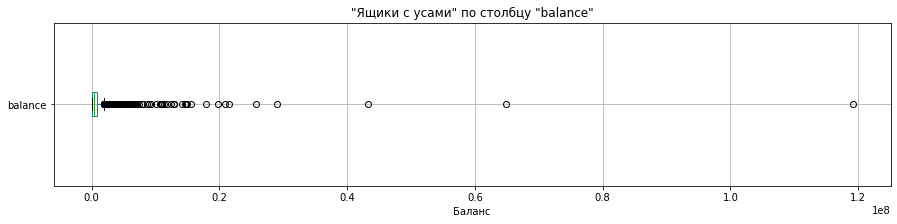

In [14]:
#построим "ящик с усами" по столбцу "balance"
df.boxplot(column='balance',figsize=(15,3),vert=False)
plt.show
plt.title('"Ящики с усами" по столбцу "balance"')
plt.xlabel('Баланс');
#выведем 95 и 99 пересентили
print('Персентили:',np.percentile(df['balance'], [95, 99]).round(2))

#запишем значение 99 пересентили в отдельную переменную для среза
percentile_99=np.percentile(df['balance'],99).round(2)

#делаем срез и выводим на экран
df_cost=df.query('balance>=@percentile_99')
#df_cost.head()
df_cost.head(10)

По графику видно, что клиенты с балансом больше 20 млн единичны, а больше 40 млн вообще всего 3. 
У 1% клиентов баланс превышет 4,2 млн. Если посмотреть на этих клиентов, то видно что клиенту имеют достаточное количество объектов недвижимости в собственности и уровень их заработной платы также высокий. Можно сделать вывод, что это премиум клиенты банка, а не аномальные значения.

Персентили: [316360.58 886322.53]


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
30,155730,946,Ярославль,Ж,47,0,0.00,2,1,1,660015.85,0
44,210313,935,Ярославль,М,41,5,3781118.22,2,1,0,761349.20,0
59,227642,930,Ярославль,Ж,36,0,0.00,2,1,0,359081.73,0
107,134358,985,Рыбинск,Ж,41,4,6749773.07,2,1,0,698013.27,0
124,192966,686,Рыбинск,Ж,33,0,0.00,1,1,1,518488.59,0
125,227092,1000,Ярославль,М,32,5,19757180.85,2,1,1,1024626.50,0
137,163907,761,Ярославль,М,31,0,0.00,1,1,0,999177.17,0
138,173386,915,Ярославль,Ж,48,0,0.00,2,0,0,800733.72,0
139,195558,927,Ярославль,М,32,0,0.00,1,1,1,469062.08,0
143,198181,958,Ярославль,М,34,3,5763239.76,2,1,1,920730.06,1


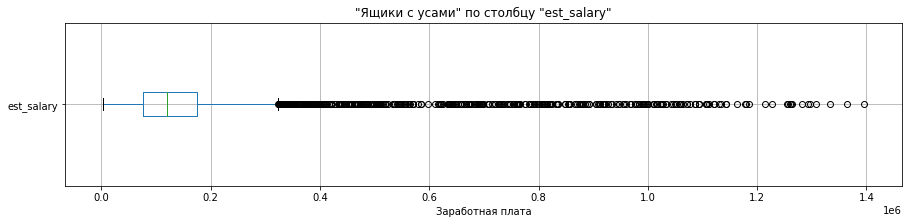

In [15]:
#построим "ящик с усами" по столбцу "est_salary"
df.boxplot(column='est_salary',figsize=(15,3),vert=False)
plt.show
plt.title('"Ящики с усами" по столбцу "est_salary"')
plt.xlabel('Заработная плата');
#выведем 95 и 99 пересентили
print('Персентили:',np.percentile(df['est_salary'], [95, 99]).round(2))

#запишем значение 99 пересентили в отдельную переменную для среза
percentile_95_salary=np.percentile(df['est_salary'],95).round(2)

#делаем срез и выводим на экран
df_salary_cost=df.query('est_salary>=@percentile_95_salary')
df_salary_cost.head(12)

При анализе заработной платы, также видны высокие значения у некоторых клиентов. У 5% клиентов уровень заработной платы более 316 т.р., а у 1% клиентов более 886 т.р. При этом в этот же список попали клиенты с большими остатками на счетах, а у остальных на счетах 0.  

Можно предположить что у тех клиентов, которые не хранят средства на счетах, но при этом имеют крупные зачисления, это средства зачислились разово в рамках премии, либо от какой-либо крупной сделки, также же в этот список могут попасть так называемые "обнальщики".

Клиентов которые имеют большие остатки и зачисления, выделим в отдельный список и назовем их "Премиум клиенты". При дальнейшем анализе при необоходимости будем делать срез без них, чтобы не искажать данные

In [16]:
#список с премиум-клиентами
premium_clients=df.query('balance>=@percentile_99')

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* В общем сильных аномалий в данных нет. Есть единичные выбросы в столбце с балансом и заработной платой, но они также объяснимы.

</div>       
<br>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>ОБЩИЙ ВЫВОД ПО ПРЕДОБРАБОТКЕ:</b><br>
    
* Привели названия столбцов к единому стилю
* Удалили пропуски в столбце "возраст" , и заменили пропуски в столбце "баланс" на 0
* Изменили тип данных в столбцах "score" и "age" на int
* Явных дубликатов в данных не выявлено, Неявные присутствуют в столбце с номером клиента, но это объясняется тем что клиент может осблуживаться в разных городах
* Аномалий в данных не выявлено
</div>       
<br>

<hr style="border: 2px solid #425F57;" />
<hr style="border: 2px solid #425F57;" />

## Исследовательский анализ данных

### Распределение клиентов в разрезе различных признаков

В датасете есть различные признакм у каждого клиента. Рассмотрим как распределяются клиенты банка в разрезе каждого из них:

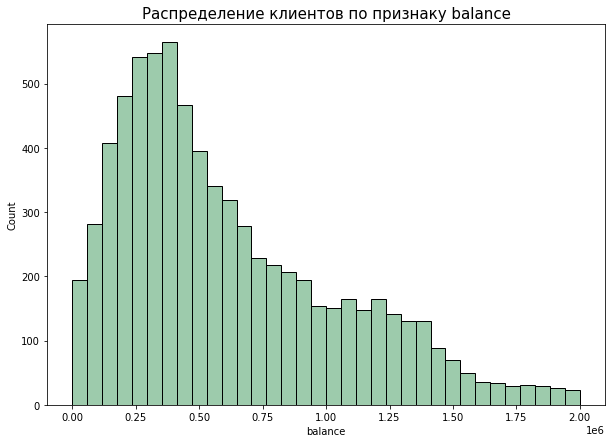

In [17]:
#делаем срез без премиуем-клиентов
df_new=df.query('balance<=@percentile_99')
colors=sns.set_palette("crest")

#cтроим график по столбцу balance. Делаем срез по балансу на основании ранее построенного боксплота,чтобы график был читаемый
plt.figure(figsize=(10,7))
sns.histplot(data=df_new.query('balance<2000000 and balance>0'), x='balance',palette="crest")
plt.title('Распределение клиентов по признаку balance', fontsize = 15)
plt.show();

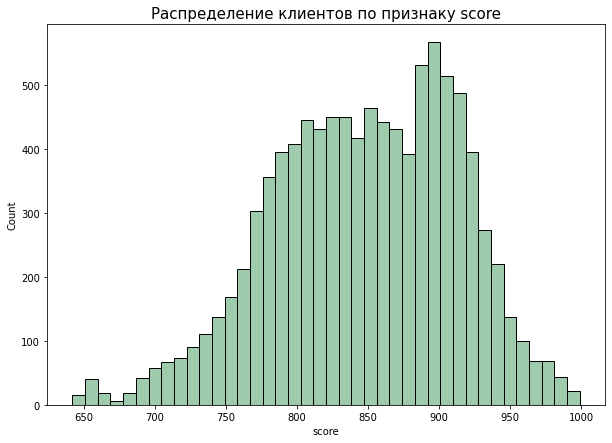

In [18]:
#cтроим график по столбцу score.
plt.figure(figsize=(10,7))
sns.histplot(data=df_new, x='score',palette="crest")
plt.title('Распределение клиентов по признаку score', fontsize = 15)
plt.show();

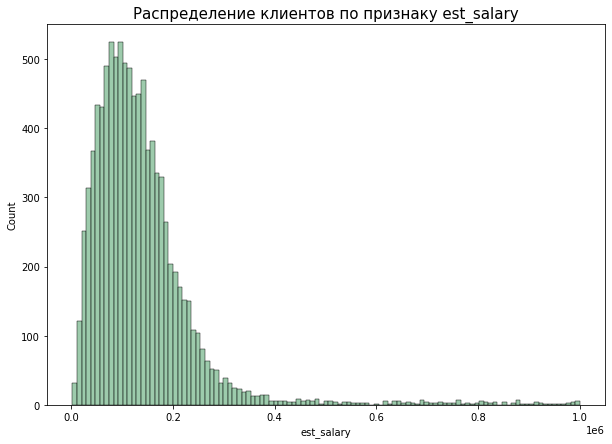

In [19]:
#cтроим график по столбцу est_salary. Делаем срез по балансу на основании ранее построенного боксплота,чтобы график был читаемый
plt.figure(figsize=(10,7))
sns.histplot(data=df_new.query('est_salary<1000000'), x='est_salary',palette="crest")
plt.title('Распределение клиентов по признаку est_salary', fontsize = 15)
plt.show();

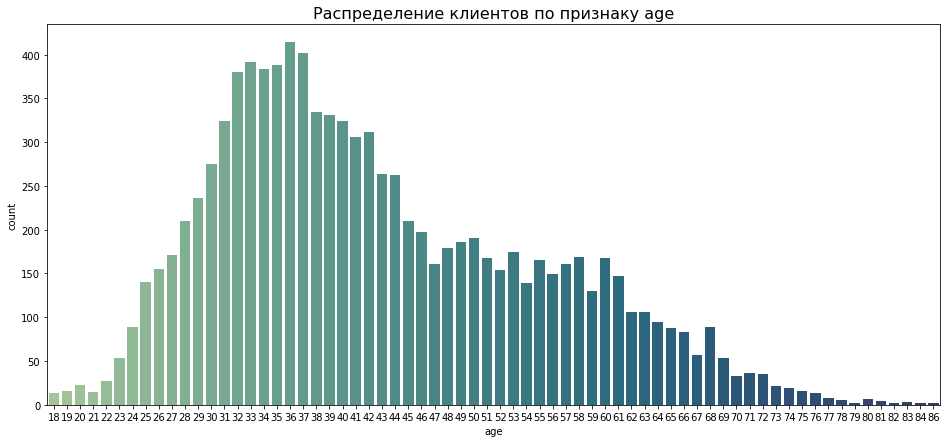

In [20]:
#строим график распределения по возрасту
colors=sns.set_palette("crest")
plt.figure(figsize=(16,7))
sns.countplot(data=df, x='age',palette="crest");
plt.title('Распределение клиентов по признаку age', fontsize = 16, color = 'black')
plt.show()

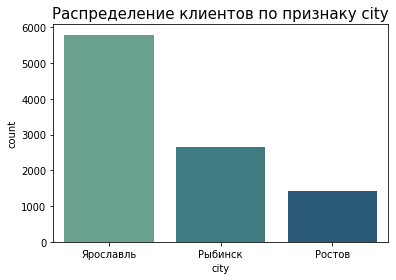

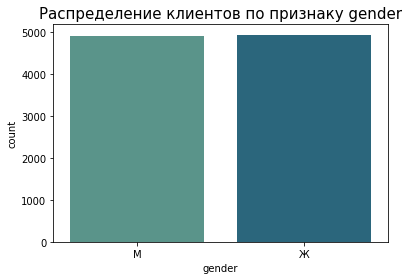

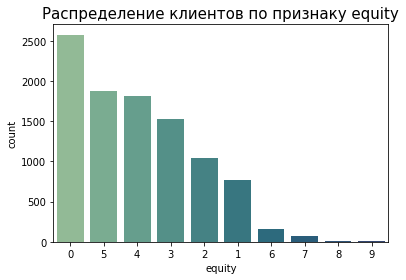

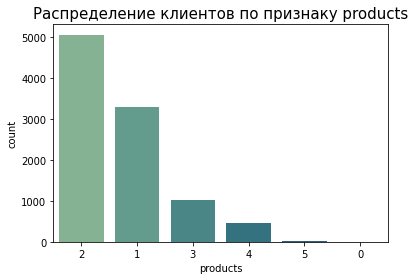

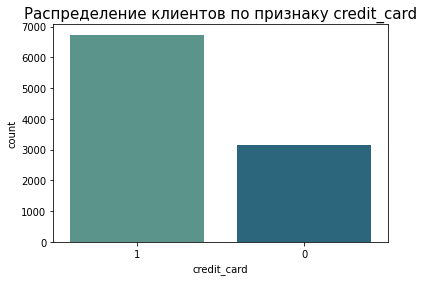

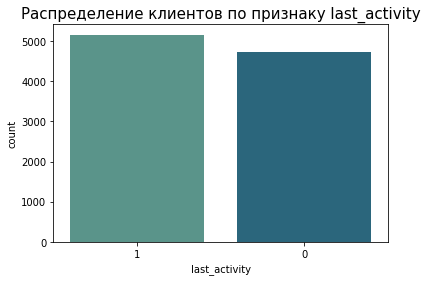

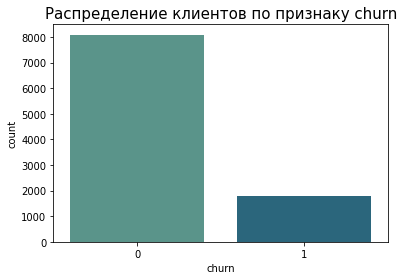

In [21]:
#строим графики распределения по городу, полу, наличию недв-ти, количества продуктов, наличия кредитной карты
for i in ['city','gender','equity','products','credit_card','last_activity','churn']:
    counts = df[i].value_counts().sort_values(ascending=False)
    #ax = plt.subplot(3, 2)
    ax=sns.countplot(data=df_new, x=i,order=counts.index,palette="crest");
    plt.title(f'Распределение клиентов по признаку {i}', fontsize = 15)
    plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    Рассмотрев распределение клиентов в разрезе различных признаков можно сказать следующее:
    
* `возраст`-в датасете представлены данные о клиентах с 18 до 86 лет. Большинство клиентов от 32 до 37 лет. Клиентов начиная с 38 лет становится меньше. Возможно банку стоит обратить внимание на привлечение клиентов с возрастов от 38 лет и больше
* `город`- больше всего клиентов из Ярославля, затем идет Рыбинск и на 3 месте Ростов
* `пол`-мужчин и менщин практически одинаковое кол-во
* `объекты собственности`-в большинства клиентов нет недвижимости, также много клиентов у которых от 3 до 5 объектов недвижимости (что странно, потому что это достаточно большое кол-во),1-2 объекта уже у меньшего кол-ва, а больше 6 уже редкость
* `продукты`-большинство клиентов имеют 1 или 2 продукта в банке,большое 2 уже гораздо реже
* `кредитные карты`-есть практичеси у 70% клиентов
* `скоринг`-у большинства клиентов высокий скоринговый балл, с низким скоринговым баллом клиентов мало
* `баланс`- у большинства клиентов на балансе есть сумма от 50 т.р. до 200 т.р.
* `уровень зп`-у большинства клиентов уровень зп от 50 т.р. до 200 т.р.
* `активность клиента`-чуть больше половины клиентов активно пользуются продуктами
* `отток`-около 20% клиентов ушли из банка
</div>       
<br>

### Описание портрета клиента склонного к оттоку

Т.к цель нашего исследования выявить сегменты клиентов которые склонны уходить из банка, прпонализируем клиентов которые ушли из банка в разрезе различных признаков и составим примерный портрет:

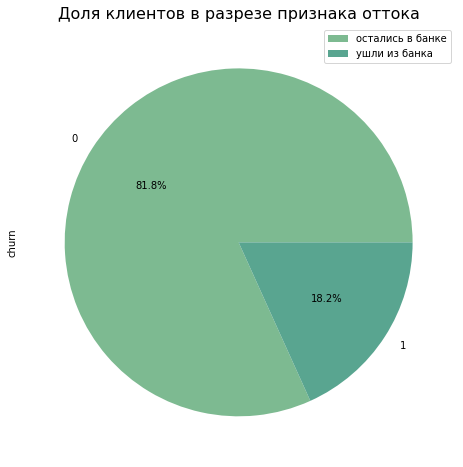

In [22]:
churn= df.groupby('churn')['churn'].count().plot(kind = 'pie', y ='count', autopct='%1.1f%%', figsize= (8,8))
plt.title('Доля клиентов в разрезе признака оттока', fontsize = 16)
plt.legend(['остались в банке', 'ушли из банка'])
plt.show()

В разрезе оттока 81.8% клиентов остаются в банке,18.2% уходят

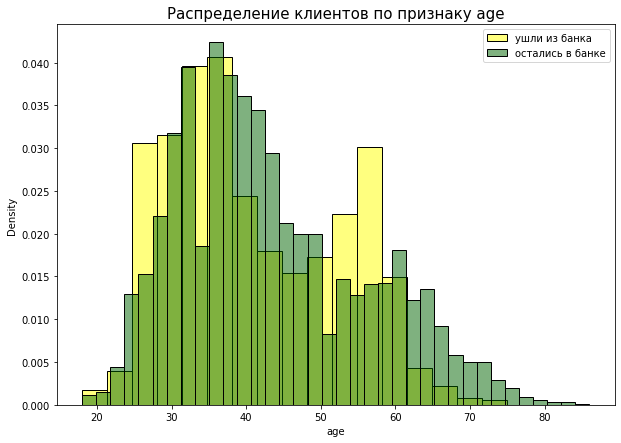

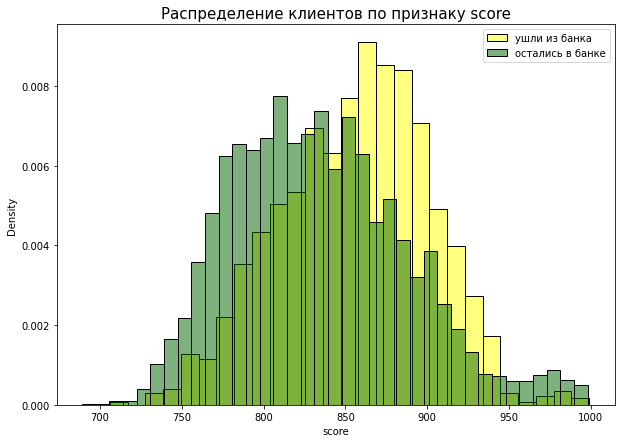

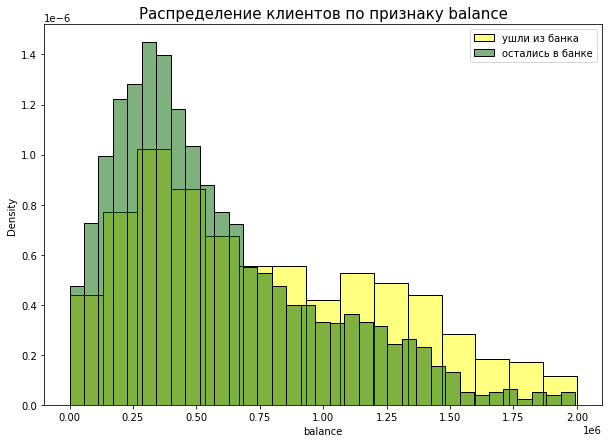

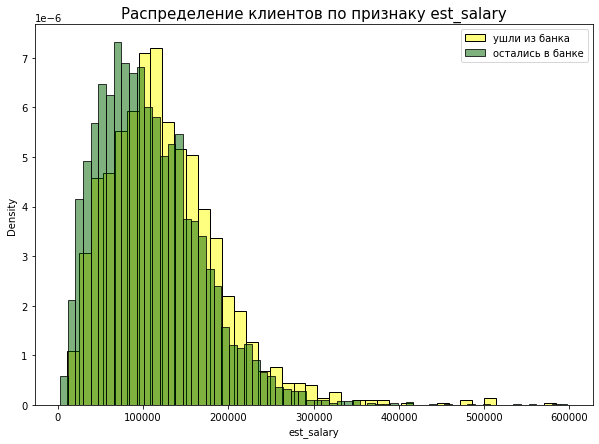

In [23]:
#чтобы сделать графики читаемыми обрежем "хвосты"
df_new=df.query('balance<2000000 and balance>0 and est_salary<600000')

#строим графики по признакам age,balance,score,est_salary разрезе оттока
for i in ['age','score','balance','est_salary']:
    plt.figure(figsize=(10,7))
    ax=sns.histplot(data = df_new[df_new['churn'] == 1][i], color = '#FFFF00',alpha = 0.5, stat = 'density', common_norm =False) 
    ax2=sns.histplot(data = df_new[df_new['churn'] == 0][i], color = '#006400',alpha = 0.5, stat = 'density', common_norm =False)
    ax=ax2
    plt.legend(['ушли из банка', 'остались в банке']) 
    plt.title(f'Распределение клиентов по признаку {i}', fontsize = 15)
    plt.show()

По данныи графикам можно сказать следующее:
   * В разрезе возраста больше уходят из банка клиенты в возрасте от 25 до 40 и от 50 до 60. Остаются чаще от 40 до 50 и старше 60
   * В разрезе признака скоринговго балла чаще уходят из банка клиенты с высоким скорингом: от 850 до 950, остаются со средним и низким: ниже 850
   * В разрезе признака баланса чаще уходят из банка клиенты с балансом выше 750 т.р., а остаются с балансом от 0 до 750 т.р.
   * В разрезе признака зарплаты чаще уходят клиенты от 100 т.р и выше, остаются клиенты с зп до 100 т.р.

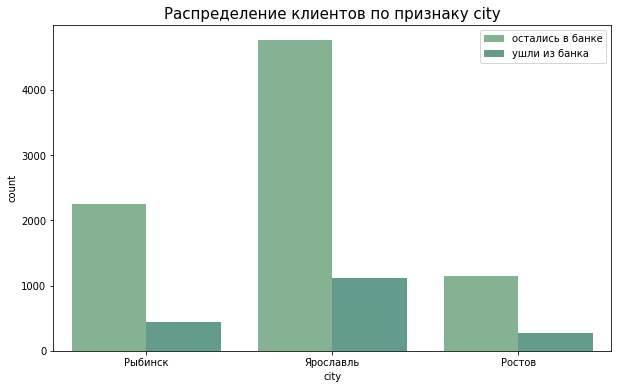

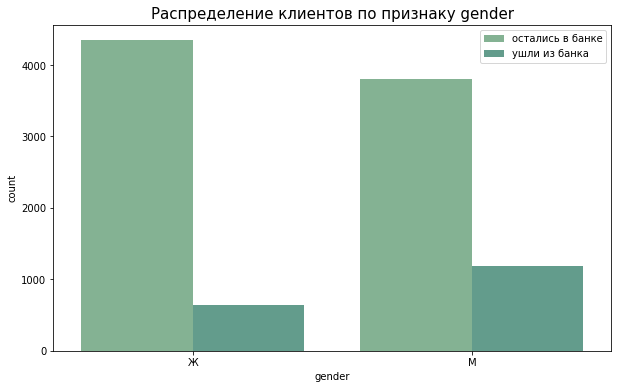

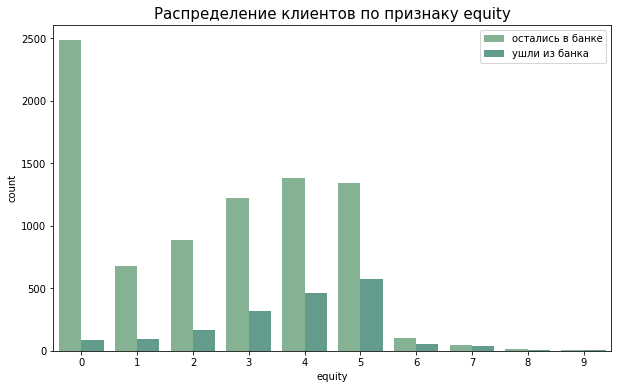

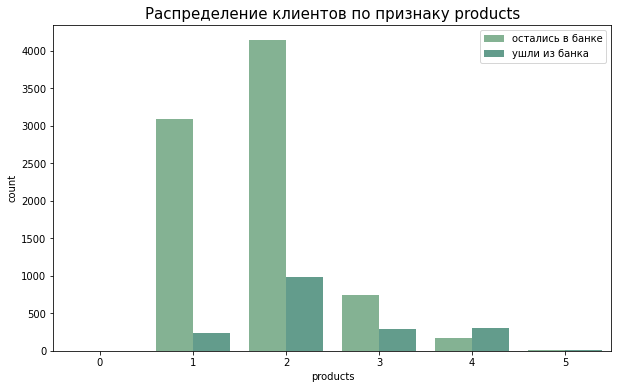

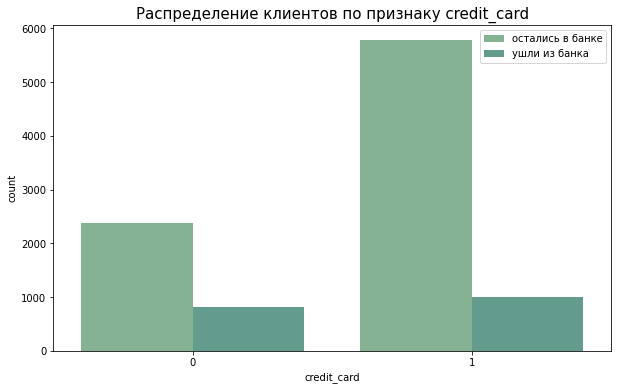

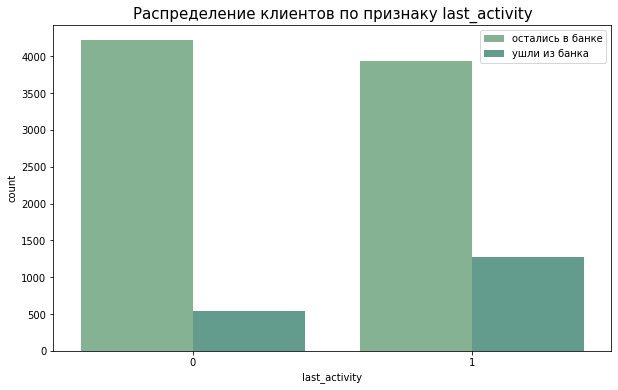

In [24]:
#строим графики по признакам 'city','gender','equity','products','credit_card','last_activity в разрезе оттока
for i in ['city','gender','equity','products','credit_card','last_activity']:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=i, hue='churn')
    #sns.histplot(data=df,x=i,hue="churn");
    plt.title(f'Распределение клиентов по признаку {i}', fontsize = 15)
    plt.legend(['остались в банке','ушли из банка'])
    plt.show()
    

По данныи графикам можно сказать следующее:
   * `город`-больше всего оттока в Ярославле
   * `пол`- больше всего оттока у мужчин
   * `недвижимость в сосбственности`-больше уходят клиенты в соственности которых 3-5 объектов нед-ти
   * `продукты`-больше уходят клиенты у которых есть 2 продукта банка
   * `кредитная карта`-у большинства клиентов была кредитная карта
   * `активность`-чаще уходят активные клиенты банка

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    После анализа клиентов которые ушли из банка, можно сложить портрет клиента склонного к оттоку:
    
* В разрезе оттока 81.8% клиентов остаются в банке,18.2% уходят   
* клиент в возрасте от 31 до 37 лет, а также кленты предпенсионного возраста от 52 до 58 лет
* проживающее в Ярославле
* в большей степени мужчины
* клиенты имеющие 3-5 объектов недвижимости в собственности
* с 2 открытыми банковскими продуктами
* у большинства клиентов была кредитная карта
* с балансом на счете от 200 т.р. до 1 млн
* с Высоким скориноговым баллом
* уровень зп от 50 т.р. до 200 т.р.

</div>       
<br>

### Корреляция признаков

Чтобы выяснить имею ли признаки взаимосвязь между собой, расчитаем корреляцию между ними и построим матрицу.  

Т.к. столбец `user_id` не является как таковым признаком, сделаем срез данных без этого столбца.  

Данные о корреляции проанализируем по шкале Чеддока (слабая — от 0,1 до 0,3; умеренная — от 0,3 до 0,5; заметная — от 0,5 до 0,7; высокая — от 0,7 до 0,9; весьма высокая (сильная) — от 0,9 до 1,0



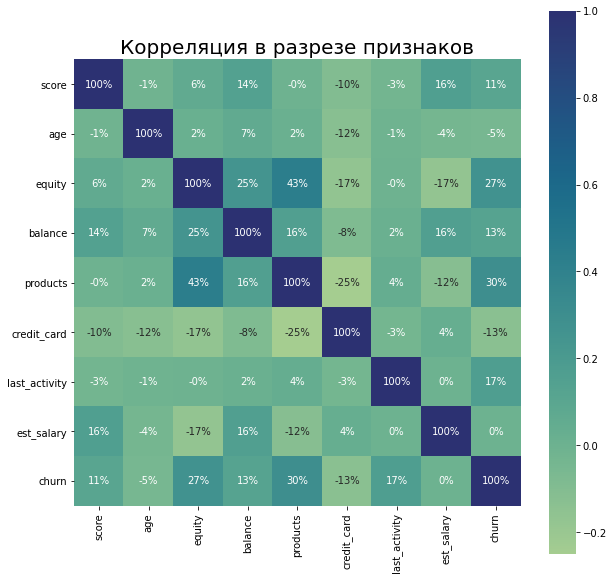

In [25]:
#строим матрицу коррелляций
corr = df.loc[:, df.columns !='user_id'].corr()

#визуализируем матрицу корреляций
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True,cmap="crest",fmt=".0%")
plt.title('Корреляция в разрезе признаков', fontsize = 20)
plt.show()

Также отдельно построим корреляцию признака оттока клиентов, с остальными признаками:

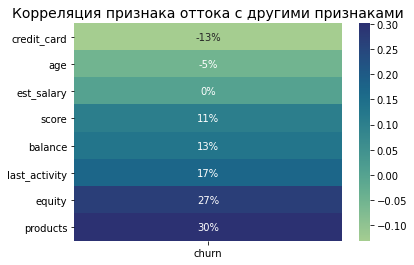

In [26]:
#корреляция признака оттока с другими признаками
sns.heatmap(df.loc[:, df.columns !='user_id'].corr().loc[:,['churn']].drop('churn').sort_values('churn'),annot=True,fmt=".0%",cmap="crest")
plt.title('Корреляция признака оттока с другими признаками', fontsize = 14);

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* Разброс коэффициентов корреляции от 20 до 43%, поэтому можно сделать вывод о том, что сильной корреляции между признаками нет.
* Признак оттока наиболее коррелирует с признаком количества продуктов, но все равно корреляция не сильная (30%)
</div>       
<br>

### Сегментация на основе показателей

На основе портрета клиента сколонного к отоку можно выделить несколько признаков в которых отток выше среднего и объединить их в сегменты:  

   1. Мужчины из Ярославля без кредитной карты
   2. Клиентов с балансом от 1 млн.р. и заработной платой от 50 до 200 т.р имеющих 2 продукта в банке
   3. Активных клиентов банка с высоким кредитным рейтингом 
 
Для более обобщенных сегментов сделаем каегории клиентов на основе вышеполученных графиков и данных БКИ.
И далее посмотрим данные сегменты клиентов подробнее.

In [27]:
##добавляем столбец с типом скориногового балла
def score_type(score):
    if score['score'] >=891:
        return 'Очень высокий'
    elif (score['score'] <=890)& (score['score']>=809):
        return 'Высокий'
    elif (score['score'] <=808)& (score['score']>=711):
        return 'Средний'
    else:
        return 'Низкий'
df['score_type'] = df.apply(score_type, axis=1)

#добавляем столбец с типо баланса
def balance_type(balance):
    if balance['balance'] >=1000001:
        return 'Очень высокий'
    elif (balance['balance'] <=1000000)& (balance['balance']>=200001):
        return 'Высокий'
    elif (balance['balance'] <=200000)& (balance['balance']>=50000):
        return 'Средний'
    else:
        return 'Низкий'
df['balance_type'] = df.apply(balance_type, axis=1)

#добавляем столбец с
def est_salary_type(est_salary):
    if est_salary['est_salary'] >=1000001:
        return 'Очень высокая'
    elif (est_salary['est_salary'] <=1000000)& (est_salary['est_salary']>=200001):
        return 'Высокая'
    elif (est_salary['est_salary'] <=200000)& (est_salary['est_salary']>=50000):
        return 'Средняя'
    else:
        return 'Низкая'
df['est_salary_type'] = df.apply(est_salary_type, axis=1)

Количество клиентов в сегменте: 638
% от общего количества клиентов: 6.4


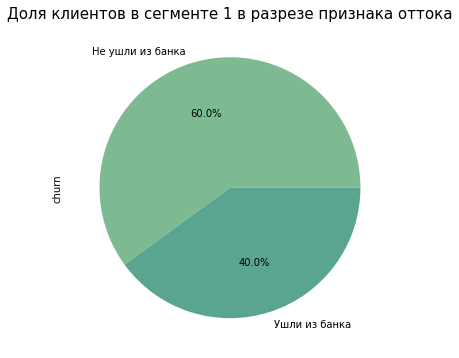

In [28]:
segment_1=df.query("gender == 'М'and city=='Ярославль' and credit_card==0")
segment_1.groupby('churn')['churn'].count().plot(kind = 'pie', y ='count', autopct='%1.1f%%', figsize= (6,6)\
                                                 ,labels=['Не ушли из банка','Ушли из банка'])
plt.title('Доля клиентов в сегменте 1 в разрезе признака оттока', fontsize = 15)
print('Количество клиентов в сегменте:',len(segment_1))
print('% от общего количества клиентов:',round((len(segment_1)/len(df))*100,2))

Количество клиентов в сегменте: 756
% от общего количества клиентов: 7.58


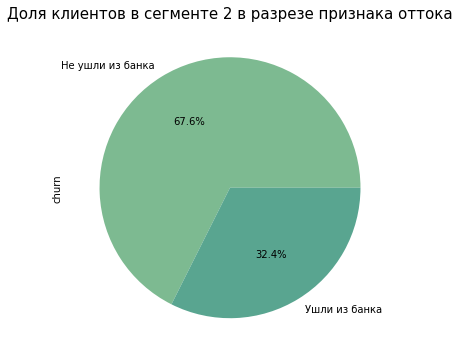

In [29]:
segment_2=df.query("balance >1000000 and est_salary_type=='Средняя' and products==2")
segment_2.groupby('churn')['churn'].count().plot(kind = 'pie', y ='count', autopct='%1.1f%%', figsize= (6,6)\
                                                 ,labels=['Не ушли из банка','Ушли из банка'])
plt.title('Доля клиентов в сегменте 2 в разрезе признака оттока', fontsize = 15)
print('Количество клиентов в сегменте:',len(segment_2))
print('% от общего количества клиентов:',round((len(segment_2)/len(df))*100,2))

Количество клиентов в сегменте: 638
% от общего количества клиентов: 20.76


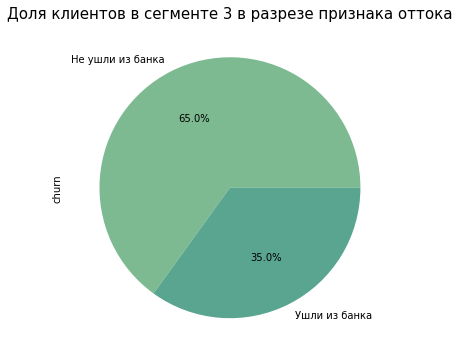

In [30]:
segment_3=df.query("score_type =='Высокий' and last_activity==1")
segment_3.groupby('churn')['churn'].count().plot(kind = 'pie', y ='count', autopct='%1.1f%%', figsize= (6,6)\
                                                 ,labels=['Не ушли из банка','Ушли из банка'])
plt.title('Доля клиентов в сегменте 3 в разрезе признака оттока', fontsize = 15)
print('Количество клиентов в сегменте:',len(segment_1))
print('% от общего количества клиентов:',round((len(segment_3)/len(df))*100,2))

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* Среди мужчин из Ярославля без кредитной карты отток составляет 40%
* Среди клиент у которых на счетах остатки от 1 млн р, с заработной платой от 50 до 200 т.р. и имеющим 2 продукта в банке уровень оттока составляет 32,4%
* Среди клиентов активных клиентов с высоким скоринговым баллом уровень оттока составляет 35%


</div>       
<br>

<hr style="border: 2px solid #425F57;" />
<hr style="border: 2px solid #425F57;" />

## Проверка статистических гипотез:

### Формулировка гипотез

***Сформулируем 2 гипотезы:***

**1 гипотеза:**

`H_0`: Доход между клиентами которые ушли и которые остались различается  
`Н_1`: Доход между клиентами которые ушли и которые остались не различается

*alpha* = 0.05


**2 гипотеза:**

`H_0`: Средний коринговый балл у клиентов которые ушли и которые остались различается  
`Н_1`: Средний скоринговый балл у клиентов которые ушли и которые остались не различается

*alpha* = 0.05

### Проверка статистической значимости

In [31]:
print('_______________________________________________________________')
print('Проверка гипотезы №1')
churn_ttest = df[df['churn']==0]['est_salary']
churn_out_ttest = df[df['churn']==1]['est_salary']
results = st.ttest_ind(churn_ttest, churn_out_ttest, equal_var=False)
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение: ', results.pvalue)
#вывод ответа
if results.pvalue<alpha:
    print(results.pvalue,'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue,'Не получилось отвергнуть нулевую гипотезу')
    
print('_______________________________________________________________')

print('Проверка гипотезы №2')
churn_ttest = df[df['churn']==0]['score']
churn_out_ttest = df[df['churn']==1]['score']
results = st.ttest_ind(churn_ttest, churn_out_ttest, equal_var=False)
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение: ', results.pvalue)
#вывод ответа
if results.pvalue<alpha:
    print(results.pvalue,'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue,'Не получилось отвергнуть нулевую гипотезу')

_______________________________________________________________
Проверка гипотезы №1
p-значение:  0.8515799588935961
0.8515799588935961 Не получилось отвергнуть нулевую гипотезу
_______________________________________________________________
Проверка гипотезы №2
p-значение:  8.60332714629934e-38
8.60332714629934e-38 Отвергаем нулевую гипотезу


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid black 2px; padding: 20px"> <b>Вывод:</b><br>
    
* Гипотезу о том, что доход между клиентами которые ушли и которые остались различается опровергнуть не получилось, следовательно доходы различаются
* Гипотезу о том, что средний коринговый балл у клиентов которые ушли и которые остались различается получилось отвергнуть,следовательно скоринговый балл похож


</div>       
<br>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<hr style="border: 2px solid #425F57;" />
<hr style="border: 2px solid #425F57;" />

## Общий вывод и рекомендации

Нами был проведен анализ клиентов регионального банка, а также выделить сегменты клиентов, которые склонны уходить из банка. 
На основе проведенного исследрвания можно сделать следюущие выводы:

   *1. В разрезе признаков по всем клиентам банка складывается следующая картина:*
* `возраст`-в датасете представлены данные о клиентах с 18 до 86 лет. Большинство клиентов от 32 до 37 лет. Клиентов начиная с 38 лет становится меньше. Возможно банку стоит обратить внимание на привлечение клиентов с возрастов от 38 лет и больше
* `город`- больше всего клиентов из Ярославля, затем идет Рыбинск и на 3 месте Ростов
* `пол`-мужчин и менщин практически одинаковое кол-во
* `объекты собственности`-в большинства клиентов нет недвижимости, также много клиентов у которых от 3 до 5 объектов недвижимости (что странно, потому что это достаточно большое кол-во),1-2 объекта уже у меньшего кол-ва, а больше 6 уже редкость
* `продукты`-большинство клиентов имеют 1 или 2 продукта в банке,большое 2 уже гораздо реже
* `кредитные карты`-есть практичеси у 70% клиентов
* `скоринг`-у большинства клиентов высокий скоринговый балл, с низким скоринговым баллом клиентов мало
* `баланс`- у большинства клиентов на балансе есть сумма от 50 т.р. до 200 т.р.
* `уровень зп`-у большинства клиентов уровень зп от 50 т.р. до 200 т.р.
* `активность клиента`-чуть больше половины клиентов активно пользуются продуктами
* `отток`-около 20% клиентов ушли из банка

*2. 18,2% клиентов банка являются отточными. Среди таких клиентов пробладают следующие признаки :*  
    
* клиент в возрасте от 31 до 37 лет, а также кленты предпенсионного возраста от 52 до 58 лет
* проживающее в Ярославле
* в большей степени мужчины
* клиенты имеющие 3-5 объектов недвижимости в собственности
* с 2 открытыми банковскими продуктами
* у большинства клиентов была кредитная карта
* с балансом на счете от 200 т.р. до 1 млн
* с Высоким скориноговым баллом
* уровень зп от 50 т.р. до 200 т.р.

*3. Выявлено 3 сегмента наиболее склонных к оттоку:*

* Мужчины из Ярославля без кредитной карты. Отток по таким клиента составляет 40%.  
`Рекомендация`-провести дополнительный анализ трат клиентов данного сегмента, в каких категориях и в каких объемах совершаются покупки, и предложить таким клиентам бесплатную кредитную карту с длительным льготным периодом для трат в определенных категориях
* Клиенты с балансом от 1 млн.р. и заработной платой от 50 до 200 т.р имеющих 2 продукта в банке. Отток по таким клиентам составляет 32.4%  
`Рекомендация`-предложить таким клиентам премиум обслуживание, на более выгодных условиях. Повысить ставки по накопительным счетам или вкладам, добавить инвестиционные предложения, выделить персональных менеджеров.
* Активных клиентов банка с высоким кредитным рейтингом. Отток по таким клиентам составляет 35%  
`Рекомендация`- Предложить акционные предложения по потребительским кредитам или ипотеке.

  

# Презентация https://disk.yandex.ru/i/UqTtiIfRwAa4XA